In [26]:
pip install "nbformat>=4.2.0" ipykernel


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
pd.options.display.max_rows = 500

In [16]:

market_data = pd.read_csv(f"prices_round_1_day_0.csv", sep=";", header=0)
trade_history = pd.read_csv(f"trades_round_1_day_0.csv", sep=";", header=0)


In [3]:
market_data.head()


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
1,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
2,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
3,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
4,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0


In [17]:
squid_data = market_data[market_data['product'] == 'SQUID_INK']
rainforest_data = market_data[market_data['product'] == 'RAINFOREST_RESIN']
kelp_data = market_data[market_data['product'] == 'KELP']

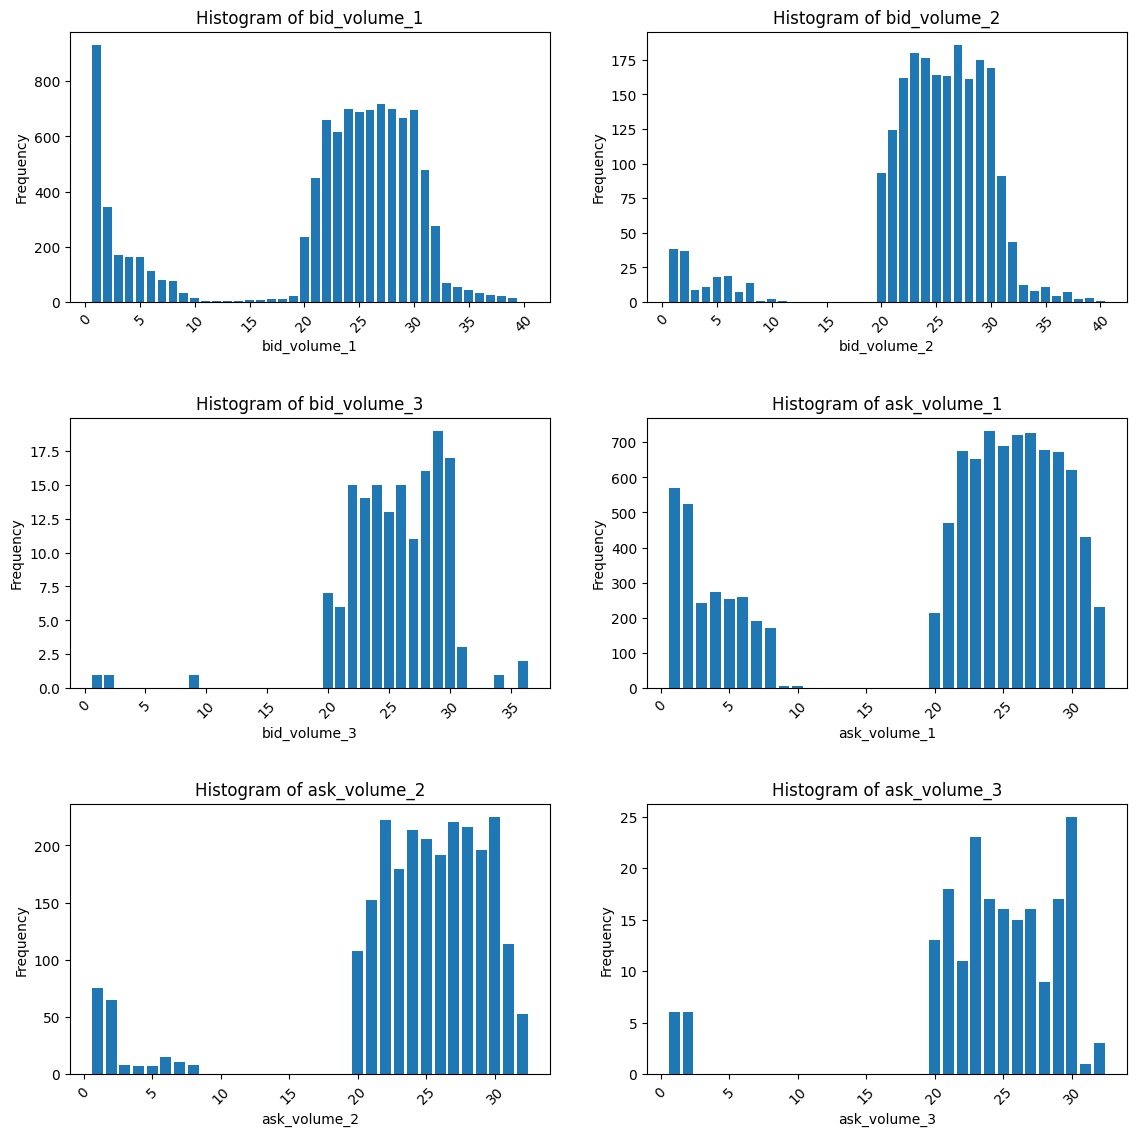

In [18]:
columns_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    volume_counts = squid_data[column].value_counts()
    
    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

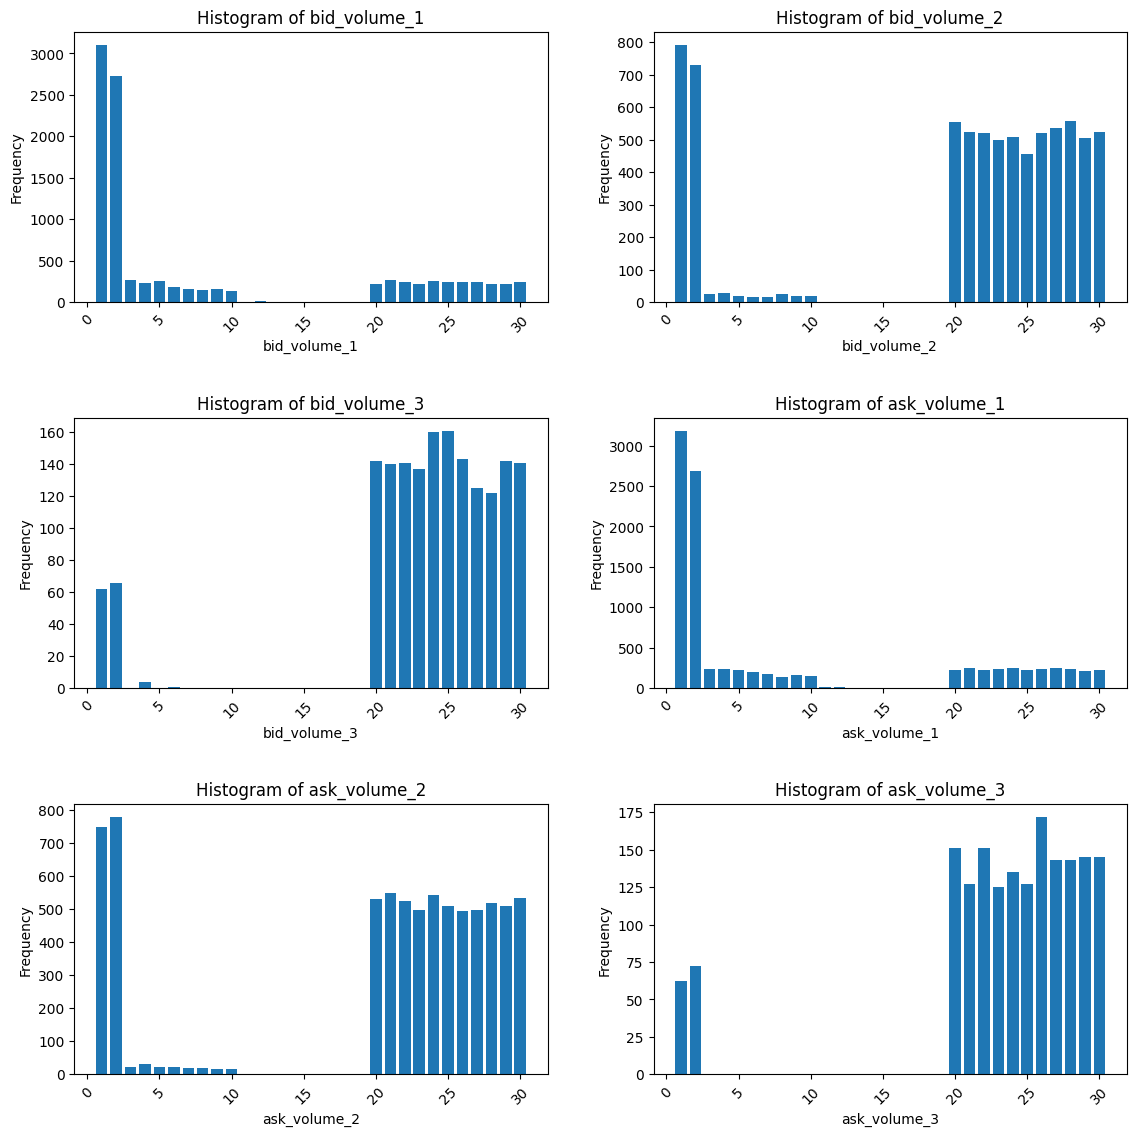

In [41]:
columns_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    volume_counts = rainforest_data[column].value_counts()
    
    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

In [19]:
def calculate_mm_mid(row):
    # Find the best bid with volume >= 20
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 20:
            best_bid = row[f'bid_price_{i}']
            break
    else:
        best_bid = None

    # Find the best ask with volume >= 20
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 20:
            best_ask = row[f'ask_price_{i}']
            break
    else:
        best_ask = None

    # Calculate the mid price if both best bid and ask are found
    if best_bid is not None and best_ask is not None:
        return (best_bid + best_ask) / 2
    else:
        return None

squid_data['mm_mid'] = squid_data.apply(calculate_mm_mid, axis=1)
rainforest_data['mm_mid'] = rainforest_data.apply(calculate_mm_mid, axis=1)
kelp_data  ['mm_mid'] = kelp_data.apply(calculate_mm_mid, axis=1)

/var/folders/6j/hqn4l3y910gbd_4bz836wfx00000gn/T/ipykernel_74508/132259191.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6j/hqn4l3y910gbd_4bz836wfx00000gn/T/ipykernel_74508/132259191.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6j/hqn4l3y910gbd_4bz836wfx00000gn/T/ipykernel_74508/132259191.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [8]:
# Create the plot using Plotly Express
fig = px.line(rainforest_data, x='timestamp', y='mm_mid', title='MM Mid Price Over Time')

# Customize the layout
fig.update_layout(
    xaxis_title='Timestamp',
    yaxis_title='MM Mid Price',
)

# Display the plot
fig.show()

In [21]:
# Create the plot using Plotly Express
fig = px.line(kelp_data, x='timestamp', y='mm_mid', title='MM Mid Price Over Time')

# Customize the layout
fig.update_layout(
    xaxis_title='Timestamp',
    yaxis_title='MM Mid Price',
)

# Display the plot
fig.show()

In [20]:
# Create the plot using Plotly Express
fig = px.line(squid_data, x='timestamp', y='mm_mid', title='MM Mid Price Over Time')

# Customize the layout
fig.update_layout(
    xaxis_title='Timestamp',
    yaxis_title='MM Mid Price',
)

# Display the plot
fig.show()

In [13]:
squid_fair_prices = squid_data[['timestamp', 'mm_mid']]
squid_fair_prices = squid_fair_prices.rename(columns={'mm_mid': 'fair'})
kelp_fair_prices = kelp_data[['timestamp', 'mm_mid']]
kelp_fair_prices = kelp_fair_prices.rename(columns={'mm_mid': 'fair'})



In [12]:
iteration_counts = [1,2,5,10,50, 100, 500,] # we lose too much data with 1000 

In [14]:
for iterations in iteration_counts:
    squid_fair_prices[f"fair_in_{iterations}_its"] = squid_fair_prices['fair'].shift(-iterations)
    squid_fair_prices[f"fair_{iterations}_its_ago"] = squid_fair_prices['fair'].shift(iterations)
    kelp_fair_prices[f"fair_in_{iterations}_its"] = kelp_fair_prices['fair'].shift(-iterations)
    kelp_fair_prices[f"fair_{iterations}_its_ago"] = kelp_fair_prices['fair'].shift(iterations)
    
    

In [15]:
for iterations in iteration_counts:
    squid_fair_prices[f'returns_in_{iterations}_its'] = (squid_fair_prices[f'fair_in_{iterations}_its'] - squid_fair_prices['fair'])/squid_fair_prices['fair']
    squid_fair_prices[f'returns_from_{iterations}_its_ago'] = (squid_fair_prices['fair'] - squid_fair_prices[f'fair_{iterations}_its_ago'])/squid_fair_prices[f'fair_{iterations}_its_ago']
    
    kelp_fair_prices[f'returns_in_{iterations}_its'] = (kelp_fair_prices[f'fair_in_{iterations}_its'] - kelp_fair_prices['fair'])/kelp_fair_prices['fair']
    kelp_fair_prices[f'returns_from_{iterations}_its_ago'] = (kelp_fair_prices['fair'] - kelp_fair_prices[f'fair_{iterations}_its_ago'])/kelp_fair_prices[f'fair_{iterations}_its_ago']
    
    
    

In [9]:
def calculate_best_bid(row):
     best_bid = None
     for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 20:
            best_bid = row[f'bid_price_{i}']
            break
     if best_bid is None:
         return None
     else:
         return best_bid

squid_data['best_bid'] = squid_data.apply(calculate_best_bid, axis=1)
rainforest_data['best_bid'] = rainforest_data.apply(calculate_best_bid, axis=1)
kelp_data['best_bid'] = kelp_data.apply(calculate_best_bid, axis=1)

/var/folders/6j/hqn4l3y910gbd_4bz836wfx00000gn/T/ipykernel_74508/2242839813.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6j/hqn4l3y910gbd_4bz836wfx00000gn/T/ipykernel_74508/2242839813.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6j/hqn4l3y910gbd_4bz836wfx00000gn/T/ipykernel_74508/2242839813.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
def calculate_best_bid(row):
     best_bid = None
     for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 20:
            best_bid = row[f'bid_price_{i}']
            break
     if best_bid is None:
         return None
     else:
         return best_bid

squid_data['best_bid'] = squid_data.apply(calculate_best_bid, axis=1)
rainforest_data['best_bid'] = rainforest_data.apply(calculate_best_bid, axis=1)
kelp_data['best_bid'] = kelp_data.apply(calculate_best_bid, axis=1)

In [45]:
def calculate_best_ask(row):
    best_ask = None
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 20:
            best_ask = row[f'ask_price_{i}']
            break
    else:
        best_ask = None 
    return best_ask

squid_data['best_ask'] = squid_data.apply(calculate_best_ask, axis=1)
rainforest_data['best_ask'] = rainforest_data.apply(calculate_best_ask, axis=1)
kelp_data['best_ask'] = kelp_data.apply(calculate_best_ask, axis=1)


/var/folders/6j/hqn4l3y910gbd_4bz836wfx00000gn/T/ipykernel_28672/2250543659.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6j/hqn4l3y910gbd_4bz836wfx00000gn/T/ipykernel_28672/2250543659.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6j/hqn4l3y910gbd_4bz836wfx00000gn/T/ipykernel_28672/2250543659.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

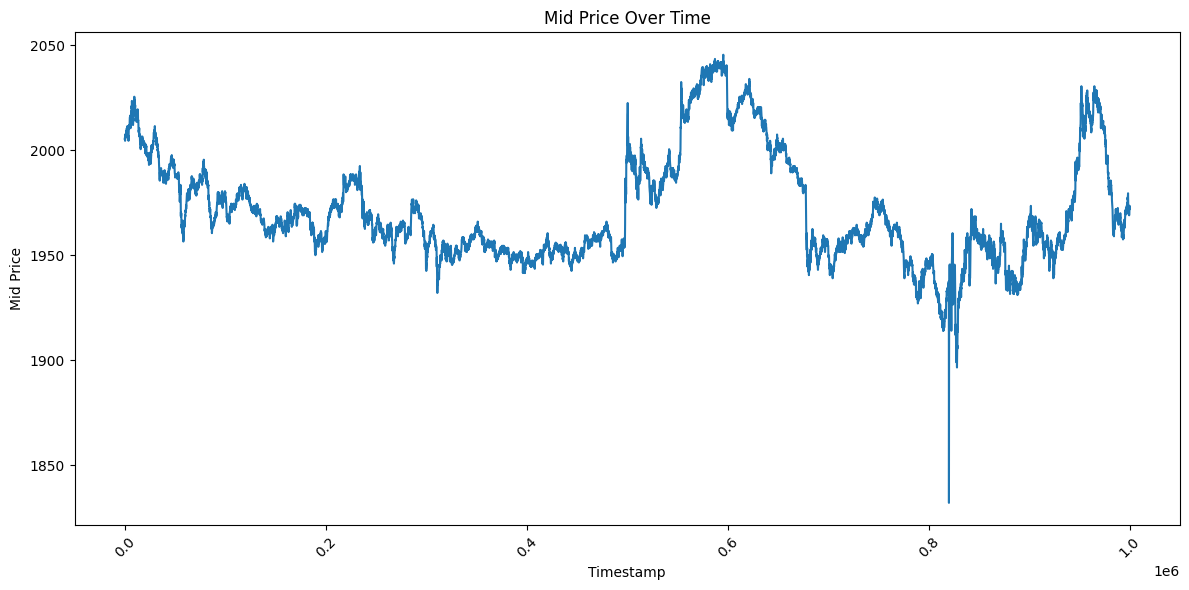

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(squid_data['timestamp'], squid_data['mid_price'])
plt.title('Mid Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


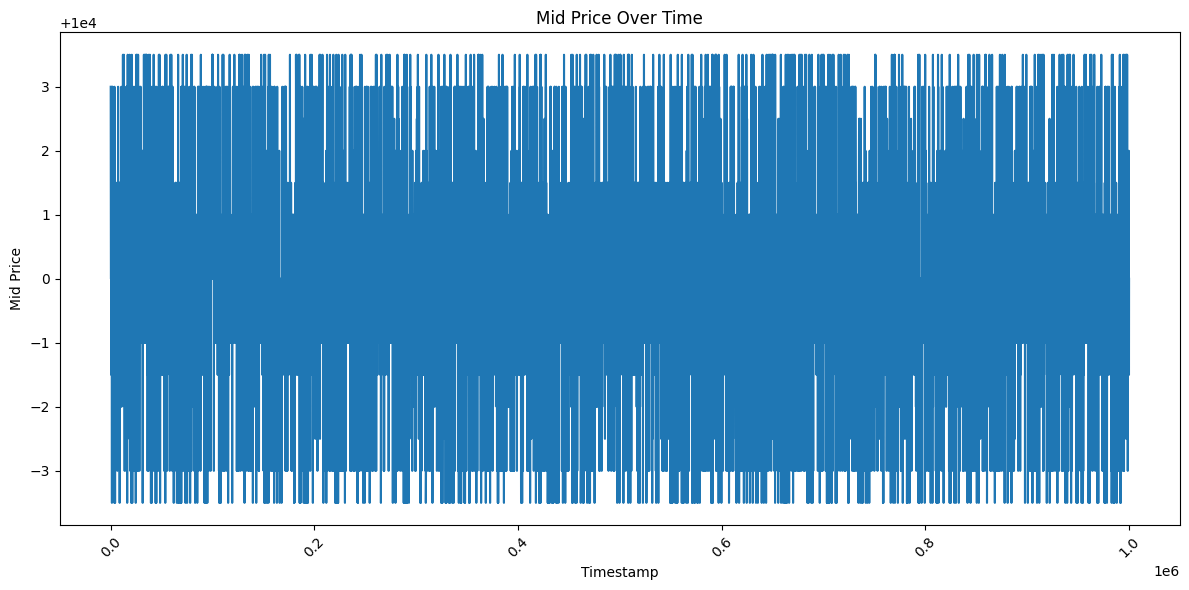

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rainforest_data['timestamp'], rainforest_data['mid_price'])
plt.title('Mid Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

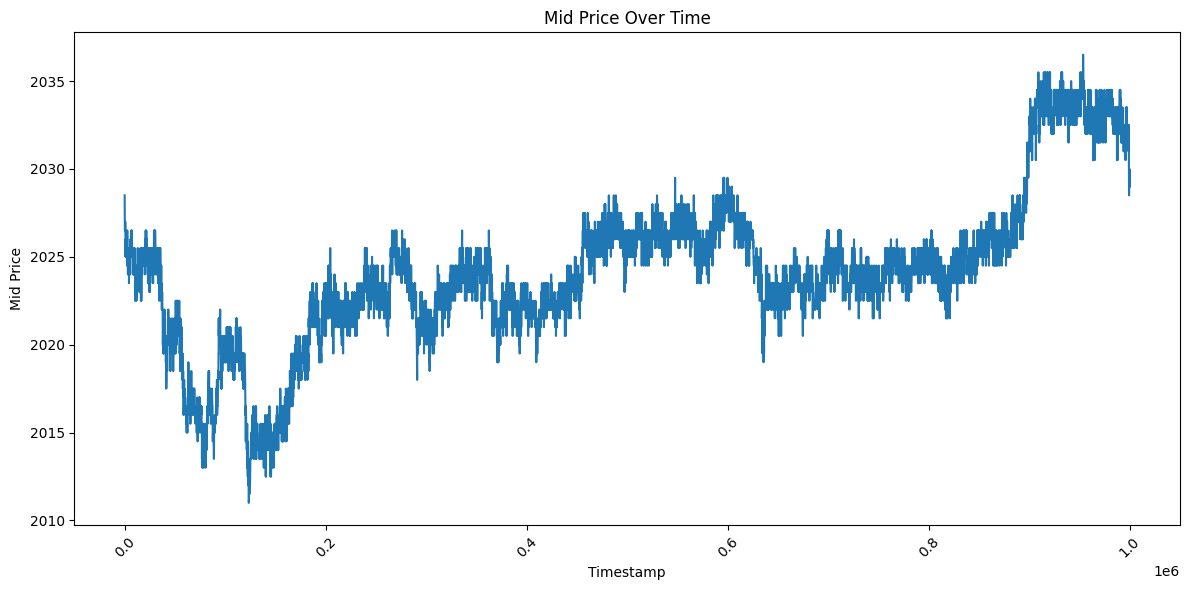

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(kelp_data['timestamp'], kelp_data['mid_price'])
plt.title('Mid Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

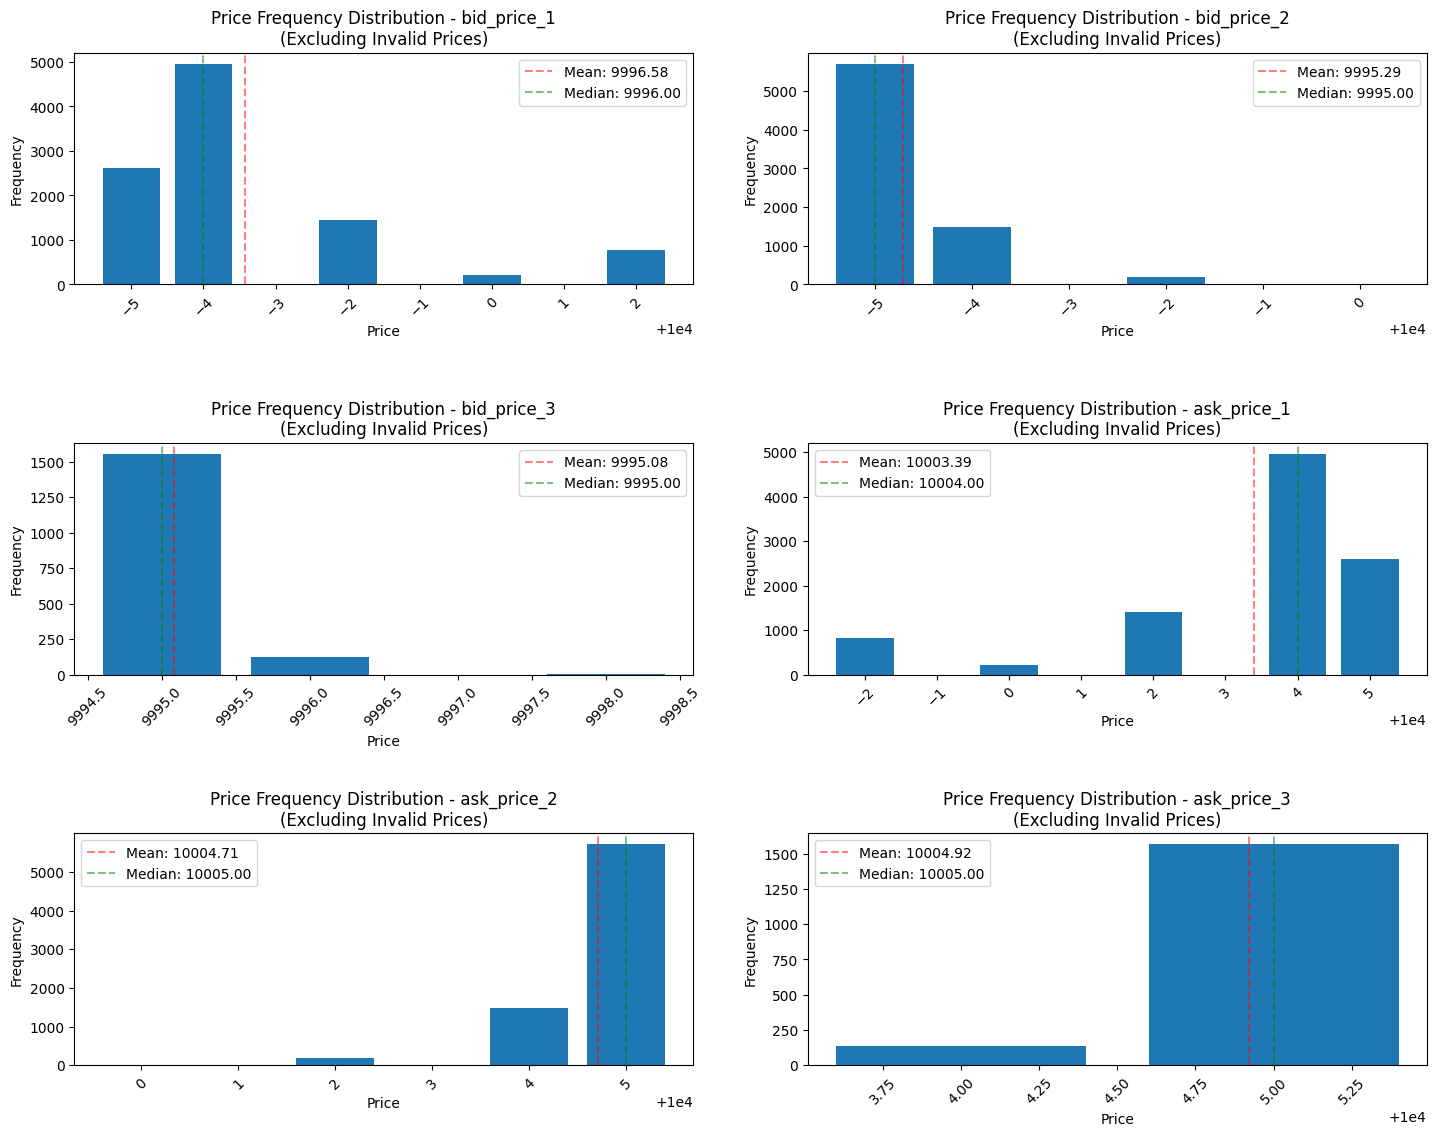


价格统计信息：

bid_price_1:
有效价格数量: 10000
无效价格数量: 0
平均价格: 1970.22
中位数价格: 1963.00
最低价格: 1830.00
最高价格: 2044.00

bid_price_2:
有效价格数量: 2212
无效价格数量: 7788
平均价格: 1969.77
中位数价格: 1962.00
最低价格: 1894.00
最高价格: 2042.00

bid_price_3:
有效价格数量: 167
无效价格数量: 9833
平均价格: 1971.92
中位数价格: 1963.00
最低价格: 1899.00
最高价格: 2039.00

ask_price_1:
有效价格数量: 10000
无效价格数量: 0
平均价格: 1972.88
中位数价格: 1965.00
最低价格: 1834.00
最高价格: 2047.00

ask_price_2:
有效价格数量: 2481
无效价格数量: 7519
平均价格: 1973.28
中位数价格: 1966.00
最低价格: 1901.00
最高价格: 2045.00

ask_price_3:
有效价格数量: 187
无效价格数量: 9813
平均价格: 1973.37
中位数价格: 1965.00
最低价格: 1921.00
最高价格: 2043.00


In [39]:
# 选择要分析的价格列
columns_to_plot = ['bid_price_1', 'bid_price_2', 'bid_price_3',
                   'ask_price_1', 'ask_price_2', 'ask_price_3']

# 设置子图布局
num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(15, 4 * num_rows))

# 为每个价格列创建直方图
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    # 过滤掉无效价格（-1和-2）
    valid_prices = rainforest_data[column][rainforest_data[column] > 0]
    
    # 计算每个价格出现的频率
    price_counts = valid_prices.value_counts()
    
    # 绘制条形图
    plt.bar(price_counts.index, price_counts.values)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title(f'Price Frequency Distribution - {column}\n(Excluding Invalid Prices)')
    plt.xticks(rotation=45)
    
    # 添加统计信息
    mean_price = valid_prices.mean()
    median_price = valid_prices.median()
    plt.axvline(mean_price, color='r', linestyle='--', alpha=0.5, label=f'Mean: {mean_price:.2f}')
    plt.axvline(median_price, color='g', linestyle='--', alpha=0.5, label=f'Median: {median_price:.2f}')
    plt.legend()
    
    plt.tight_layout(pad=3.0)

plt.show()

# 打印每个价格列的统计信息
print("\n价格统计信息：")
for column in columns_to_plot:
    valid_prices = squid_data[column][squid_data[column] > 0]
    print(f"\n{column}:")
    print(f"有效价格数量: {len(valid_prices)}")
    print(f"无效价格数量: {len(squid_data[column]) - len(valid_prices)}")
    print(f"平均价格: {valid_prices.mean():.2f}")
    print(f"中位数价格: {valid_prices.median():.2f}")
    print(f"最低价格: {valid_prices.min():.2f}")
    print(f"最高价格: {valid_prices.max():.2f}")